# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [25]:
import random
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.50564098 2.32684093 2.30718783 2.61870257 2.07140209 2.43927022
 2.6413784  2.79682461 2.12283831 2.46878117]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [48]:

def generador(bottom,ceiling,count):
    x = uniform.rvs(size=count)
    a = bottom
    b = ceiling
    randoms  = a + (b-a)*x
    return randoms  


    
primer = generador(10,15,100)

segundo= generador(10,60,1000)
print(primer)

[14.8370719  10.10963258 12.73782854 11.98585365 14.29803989 10.41659312
 10.4161539  10.38846287 12.38512599 13.61083979 13.69563677 11.01189491
 13.30128961 13.40170034 11.19985986 10.36813596 12.48435386 14.14797325
 11.16316842 13.85131492 14.55114171 12.52134726 14.07790503 10.24366707
 14.57584806 11.54171101 10.74164073 11.34843273 12.34702674 12.79053
 10.83670168 13.47581385 14.9563353  13.74144779 10.83240239 14.3965648
 11.31387902 13.0826303  10.85450285 14.66532459 10.77292743 10.22593035
 11.97540424 14.8911632  10.71787189 14.49387567 13.45902035 10.12644791
 10.05355014 14.09344768 11.4621046  14.25247992 13.07911126 14.44702632
 11.4102228  12.81003192 11.60194485 14.00897997 11.4832465  10.69869273
 10.18668561 13.56818412 12.35076321 14.05624587 13.91443729 14.21449174
 11.59888581 14.92587248 10.69009042 10.30060774 14.74601236 11.27517352
 12.42498583 12.62241425 13.73646182 12.01157818 14.00254678 14.44314843
 13.18515127 12.06245983 10.02996632 10.31796919 12.294

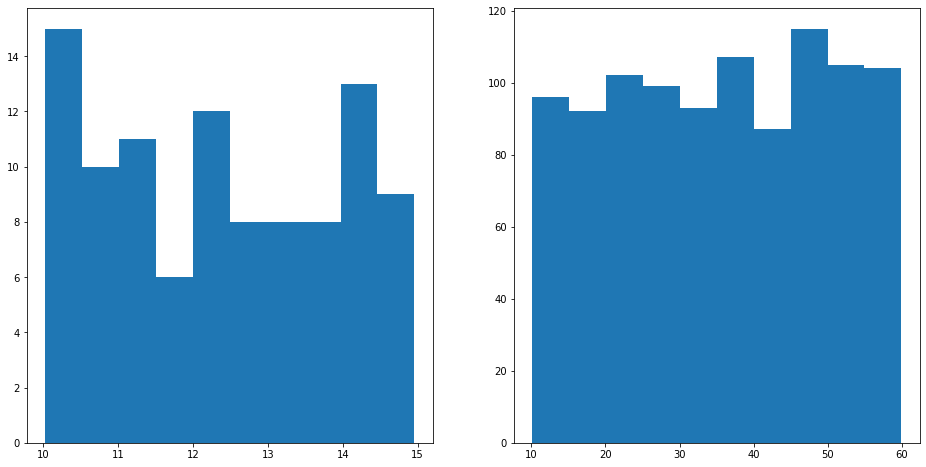

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import uniform
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.hist(primer)
plt.subplot(1,2,2)
plt.hist(segundo)



plt.show()

How are the two distributions different?

En la imagen de la izquierda solo llega como mucho hasta el 15 de altura en tanto que la figura de la derecha los valores son mucho mayores casi llegan a 120.


## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

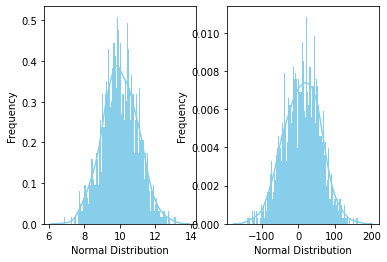

In [123]:
import seaborn as sns
from scipy.stats import norm
d = norm.rvs(loc=10, scale=1, size=1000)
e = norm.rvs(size=1000,loc=10,scale=50)

plt.subplot(1,2,1)

x = sns.distplot(d, 
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1}
                  
                   )
x.set(xlabel='Normal Distribution', ylabel='Frequency')
plt.subplot(1,2,2)

v = sns.distplot(e,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1}
                  )
v.set(xlabel='Normal Distribution', ylabel='Frequency')


plt.show()

How are the two distributions different?

Son practicamente iguales con diferentes medidas

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

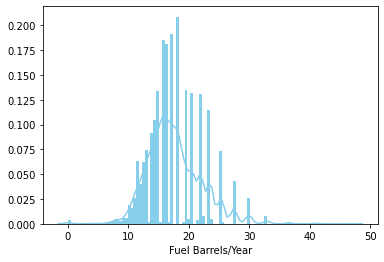

In [141]:
import pandas as pd
df = pd.read_csv("vehicles.csv")
df_fuel = sns.distplot(df["Fuel Barrels/Year"],
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1}
                  )


2. CO2 Emission Grams/Mile 

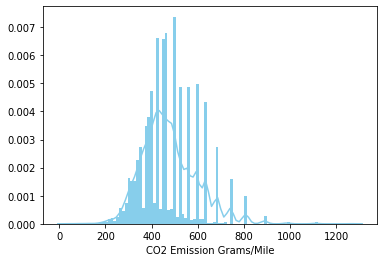

In [139]:
df_CO2 = sns.distplot(df["CO2 Emission Grams/Mile"],
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1}
                  )



3. Combined MPG

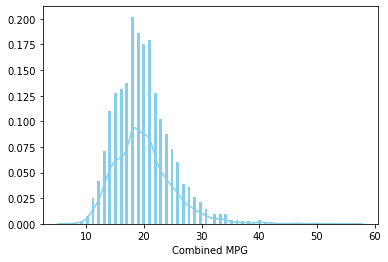

In [140]:
df_Combined = sns.distplot(df["Combined MPG"],
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1}
                  )


Which one(s) of the variables are nearly normally distributed? How do you know?

In [ ]:
Supongo que es esta última de combined Mpg por que sus valores son mas homogéneos.

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 10 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

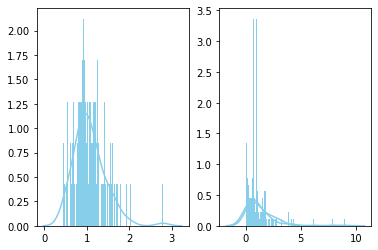

In [181]:
import numpy as np
def randomMean(tamano):
    mira=[]
    for e in range(0,tamano):
        mira.append( np.mean(np.random.exponential(size=10)))
    return mira
def secuencias(tamano1,tamano2):
    e =np.random.exponential(size=tamano1)
    d =np.random.exponential(size=tamano2)
      
    return e,d
munberUno = randomMean(100)

numbertwo = secuencias(10,100)


plt.subplot(1,2,1)

imagenUno= sns.distplot(munberUno, 
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1}
                  
                   )
x.set(xlabel='Normal Distribution', ylabel='Frequency')
plt.subplot(1,2,2)

imagenDos = sns.distplot(numbertwo[0],
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1}
                  )
v.set(xlabel='Normal Distribution', ylabel='Frequency')
imagenDoss = sns.distplot(numbertwo[1],
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1}
                  )
v.set(xlabel='Normal Distribution', ylabel='Frequency')



plt.show()

How are the two distributions different?

En la imagen de la izquierda tienes menos valores que pasan del 3 en cambio en la figura de la derecha
hay muchos mas valores que pasan. Igual que en la figura de la derecha tiene valores más altos en el eje de las y.
Por lo demás son muy parecidos



## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [ ]:
# your answer here
# Hint: This is same as saying P(x<15)

What is the probability that the customer will spend more than 15 minutes

In [ ]:
# your answer here